# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

### Exercise 10.1

Choose **ONLY ONE** of the two following possibilities:

1. Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 11 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

2. Starting from your Genetic Algorithm code implement a **Parallel Tempering algorithm** (Simulated Annealing with many temperatures). Parallelize with MPI libraries your algorithm in order to solve the TSP where each computing node, up to 11, is characterized by a different temperature or a limited set of temperatures (if you need more than 11 temperatures). Use your genetic operators (except crossover) as trial moves for the Metropolis algorithm and **add a trial move that proposes an exchange of paths among adjacent temperatures (nodes)** (see lecture 8 for the acceptance formula). The candidate solution of the TSP will appear on the node with the lower temperature.

### Exercise 10.2

Apply your parallel code to the TSP problem for 110 italian "capoluoghi di provincia" longitude and latitude coordinates in the *cap_prov_ita.dat* file.

If your choice in Exercise 10.1 is option 1, do you improve with respect using the same number of computing cores but with **independent GA searches** ?

If your choice in Exercise 10.1 is option 2, by using a number of temperatures equal to the number of individuals in your **non-parallel Genetic Algorithm code**, do you "improve" with respect to it?

### Independent Continents
```C++
11 Threads
Parameters: 
population = 3000  gen = 2000  
p = 4
```
$80\%$ cross over

After generating the new generation of population i mutate every path with probabilities:

- $20\%$ for PairPermutation
- $10\%$ for Shift
- $10\%$ for Permutation
- $20\%$ for Inversion


### Communicating Continents

- Broadcasting Migration Data: The master process (rank 0) decides which individual (h) will be migrated and which processes (giver and receiver) will be involved. This data is then broadcasted to all processes.

- Sending and Receiving Individuals: The giver process sends the selected individual's path data to the receiver process. The receiver process then updates its population with the received path.

- Generation Update: After the potential migration, all processes proceed to generate a new generation of paths.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

### Isolated continents

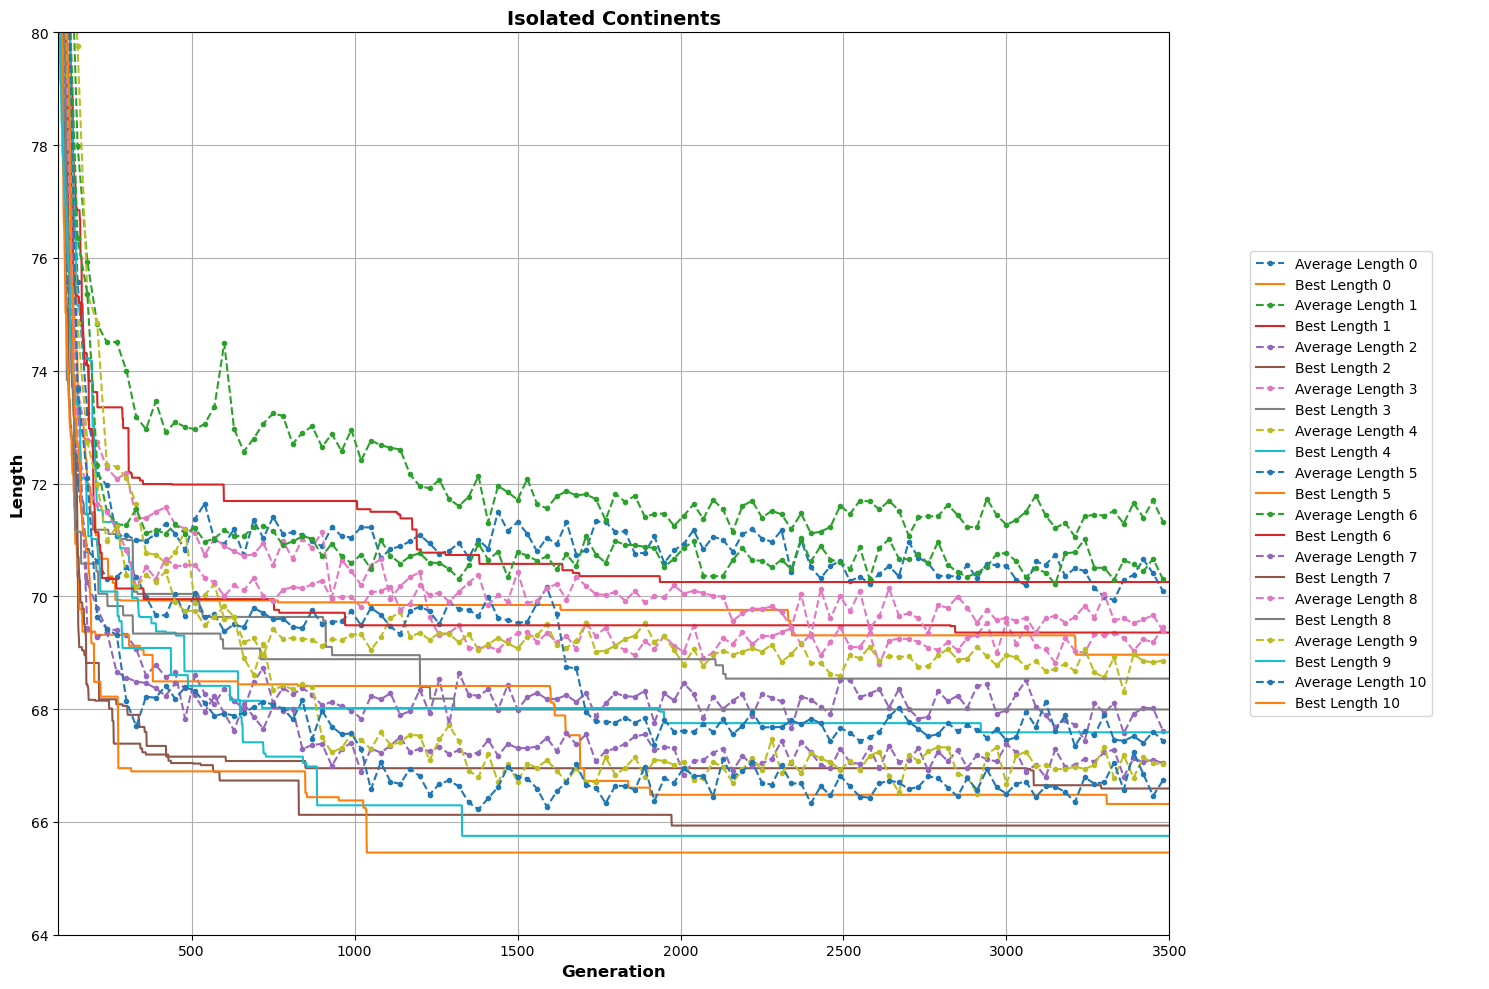

In [16]:
# Create a grid with custom width ratios using GridSpec
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[4, 1])

# The first subplot will hold all the data plots
ax_data = fig.add_subplot(gs[0])

# Iterate through the first 10 data sets and plot them
lines = []
labels = []
for i in range(11):
    # Load data from files
    gen, L = np.loadtxt(f'DATA/NoMigration/{i}/AverageLength.dat', unpack=True)
    x, best = np.loadtxt(f'DATA/NoMigration/{i}/BestLength.dat', unpack=True)
    
    # Plot the data on the first subplot

    gen = gen[::30]
    L = L[::30]
    line1, = ax_data.plot(gen, L, label=f'Average Length {i}', linestyle='--',marker='.',)
    line2, = ax_data.plot(x, best, label=f'Best Length {i}', linestyle='-', marker='')
    
    # Store lines and labels for the legend
    lines.extend([line1, line2])
    labels.extend([f'Average Length {i}', f'Best Length {i}'])

# Add titles and labels to the first subplot
ax_data.set_title('Isolated Continents', fontsize=14, fontweight='bold')
ax_data.set_xlabel('Generation', fontsize=12, fontweight='bold')
ax_data.set_ylabel('Length', fontsize=12, fontweight='bold')
ax_data.grid(True)

# The second subplot will be used for the legend
ax_legend = fig.add_subplot(gs[1])

# Remove the axis for the second subplot
ax_legend.axis('off')

# Create the legend in the second subplot
ax_legend.legend(lines, labels, loc='center', fontsize=10, ncol=1)

ax_data.set_ylim(64, 80)
ax_data.set_xlim(90, 3500)
# Adjust the layout to prevent overlap
plt.tight_layout()
# Show the plot
plt.show()


Notice that due to a high mutation probability, the algorithm does not converge to the same solution for each isolated continent. However, from the 'Best Length' graph, we can observe that the best candidate persists across generations and is not lost, indicating the algorithm's efficacy. The dotted lines depict population changes across generations, while the continuous line ('Best Length') illustrates its failure in finding a better candidate as minimum.

## Communicating Continents

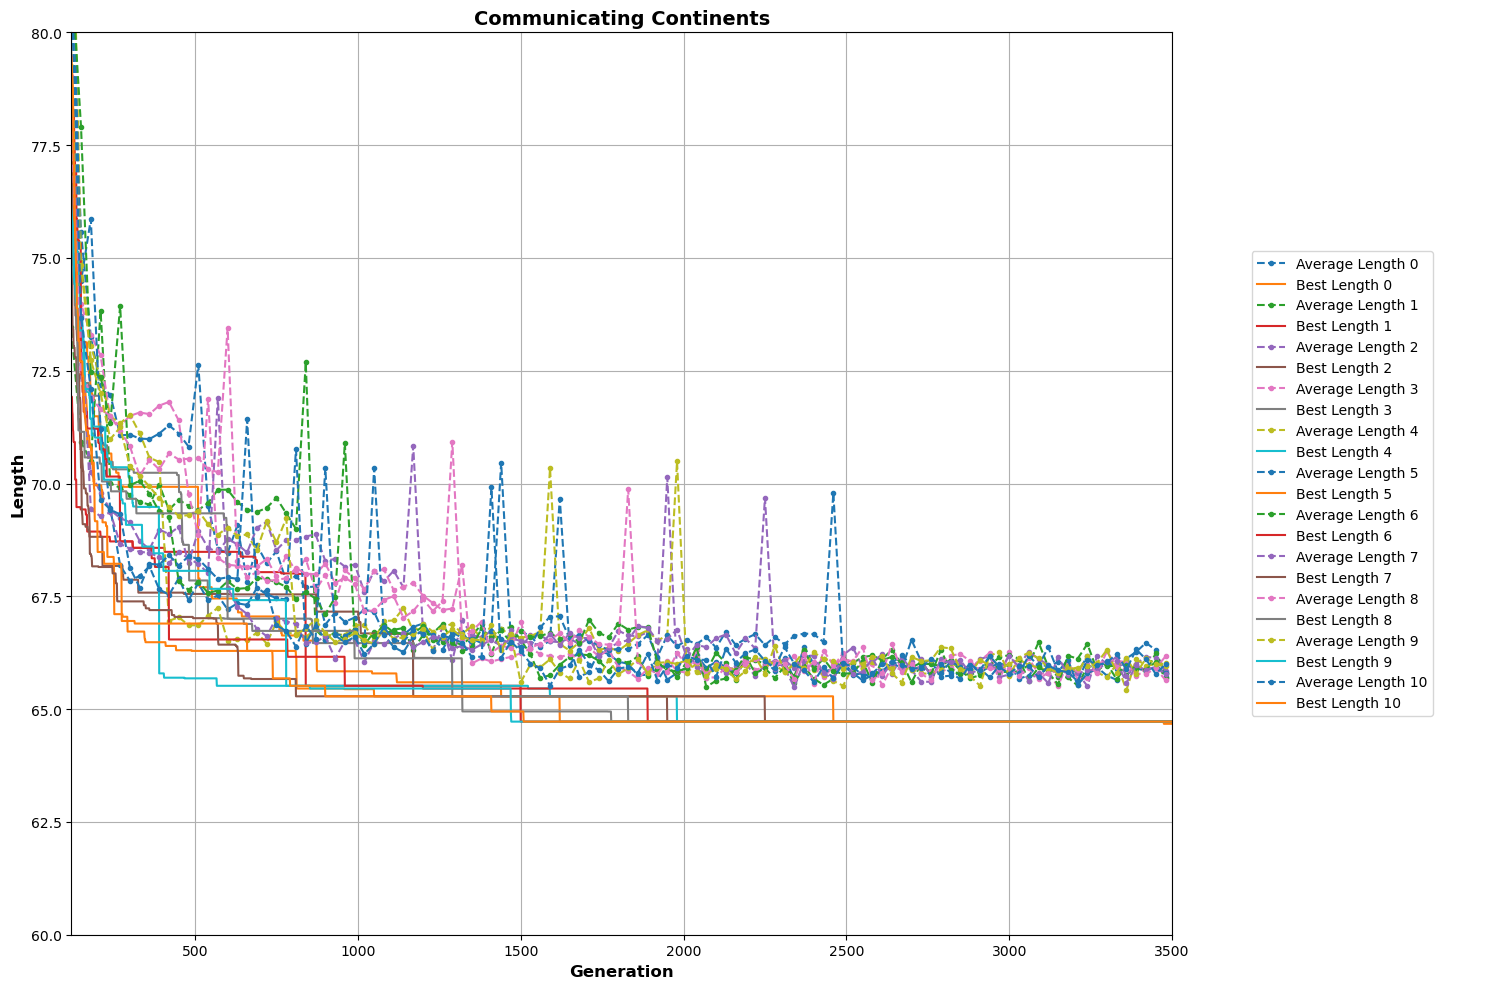

In [24]:
# Create a grid with custom width ratios using GridSpec
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[4, 1])

# The first subplot will hold all the data plots
ax_data = fig.add_subplot(gs[0])

# Iterate through the first 10 data sets and plot them
lines = []
labels = []
for i in range(11):
    # Load data from files
    gen, L = np.loadtxt(f'DATA/Migration/{i}/AverageLength.dat', unpack=True)
    x, best = np.loadtxt(f'DATA/Migration/{i}/BestLength.dat', unpack=True)
    
    gen = gen[::30]
    L = L[::30]
    # Plot the data on the first subplot
    line1, = ax_data.plot(gen, L, label=f'Average Length {i}', linestyle='--',marker='.',)
    line2, = ax_data.plot(x, best, label=f'Best Length {i}', linestyle='-')
    
    # Store lines and labels for the legend
    lines.extend([line1, line2])
    labels.extend([f'Average Length {i}', f'Best Length {i}'])

# Add titles and labels to the first subplot
ax_data.set_title('Communicating Continents', fontsize=14, fontweight='bold')
ax_data.set_xlabel('Generation', fontsize=12, fontweight='bold')
ax_data.set_ylabel('Length', fontsize=12, fontweight='bold')
ax_data.grid(True)

# The second subplot will be used for the legend
ax_legend = fig.add_subplot(gs[1])

# Remove the axis for the second subplot
ax_legend.axis('off')

# Create the legend in the second subplot
ax_legend.legend(lines, labels, loc='center', fontsize=10, ncol=1)

ax_data.set_ylim(60, 80)
ax_data.set_xlim(120, 3500)
# Adjust the layout to prevent overlap
plt.tight_layout()
# Show the plot
plt.show()


Both simulations were conducted with identical initial conditions, revealing noticeable differences between the two methods over time. Notably, the average lengths of the Communicating Continents show striking similarity, suggesting genetic information exchange, we can also see steep jumps in Best Length. Conversely, the isolated continents exhibit distinct average lengths.

Those spikes in the graph is probably due to high mutations rate causing the average Length to worsen during some generation, but the best candidate survives.

Under identical initial conditions, the Communicating Continents consistently achieve superior paths compared to the isolated ones, aligning with expectations. 

Here's a zoom of the first 1000 generations:

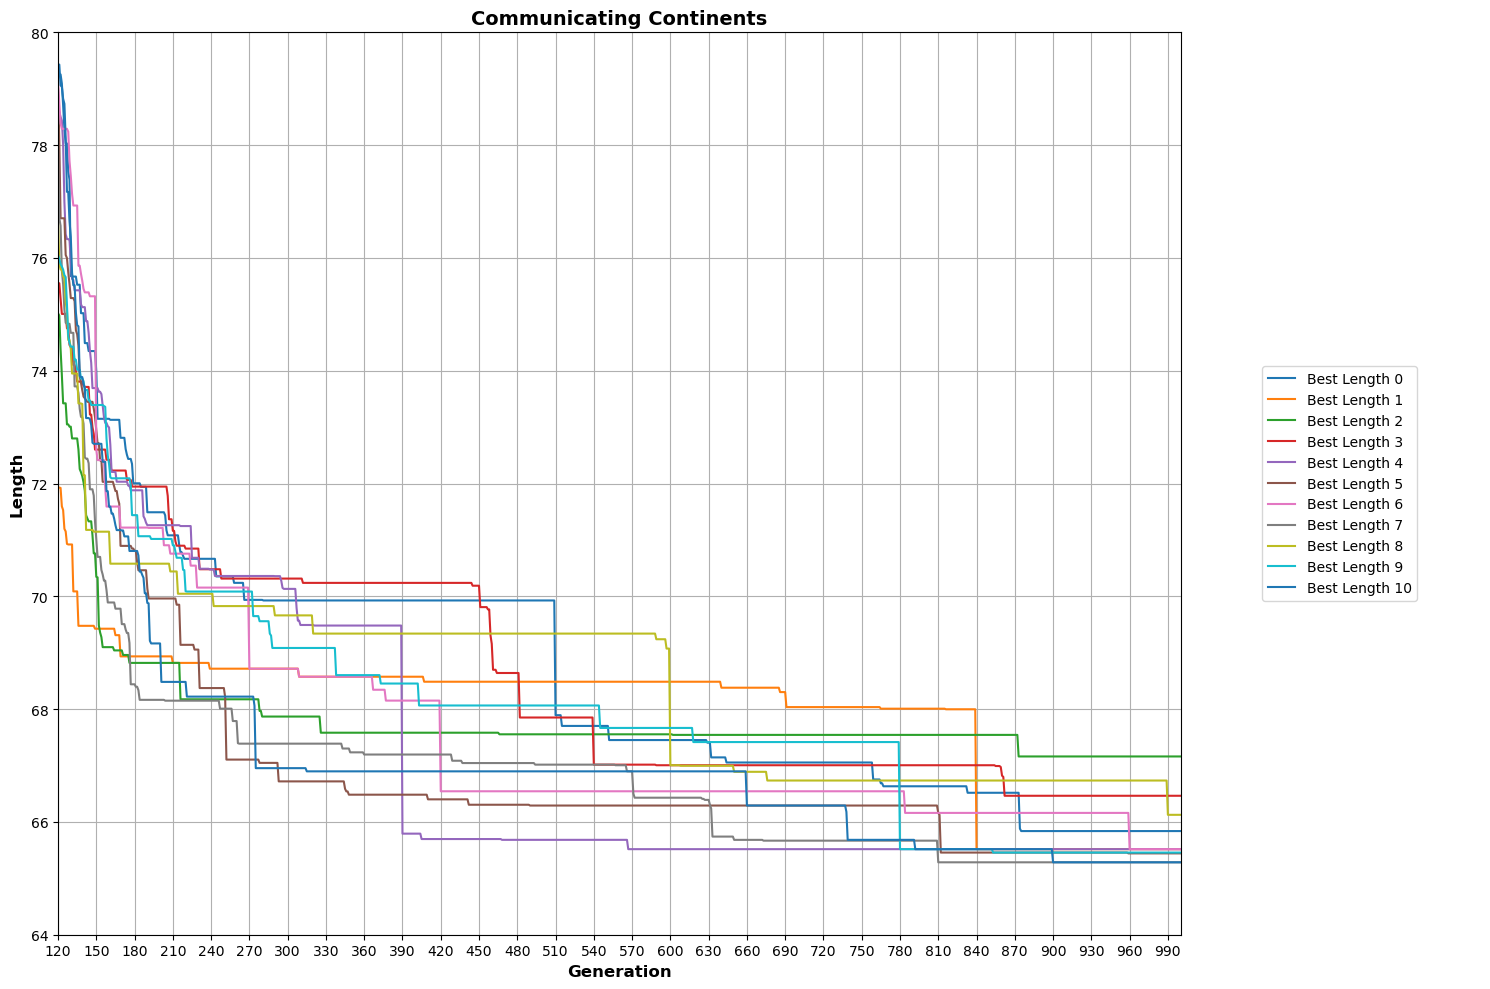

In [22]:
# Create a grid with custom width ratios using GridSpec
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[4, 1])

# The first subplot will hold all the data plots
ax_data = fig.add_subplot(gs[0])

# Iterate through the first 10 data sets and plot them
lines = []
labels = []
for i in range(11):
    # Load data from files
    x, best = np.loadtxt(f'DATA/Migration/{i}/BestLength.dat', unpack=True)

    # Plot the data on the first subplot
    line2, = ax_data.plot(x, best, label=f'Best Length {i}', linestyle='-')
    
    # Store lines and labels for the legend
    lines.extend([line2])
    labels.extend([f'Best Length {i}'])

# Add titles and labels to the first subplot
ax_data.set_title('Communicating Continents', fontsize=14, fontweight='bold')
ax_data.set_xlabel('Generation', fontsize=12, fontweight='bold')
ax_data.set_ylabel('Length', fontsize=12, fontweight='bold')
ax_data.grid(True)

# The second subplot will be used for the legend
ax_legend = fig.add_subplot(gs[1])

# Remove the axis for the second subplot
ax_legend.axis('off')

# Create the legend in the second subplot
ax_legend.legend(lines, labels, loc='center', fontsize=10, ncol=1)

ax_data.set_ylim(64, 80)
ax_data.set_xlim(120, 1000)
ax_data.set_xticks(np.arange(120, 1000, 30))
# Adjust the layout to prevent overlap
plt.tight_layout()
# Show the plot
plt.show()


Here's the history of communications in the first 1000 generations:
```python
Migration gen: 30 (giver, receiver): (8, 1)
Migration gen: 60 (giver, receiver): (4, 5)
Migration gen: 90 (giver, receiver): (10, 3)
Migration gen: 120 (giver, receiver): (5, 4)
Migration gen: 150 (giver, receiver): (3, 6)
Migration gen: 180 (giver, receiver): (10, 5)
Migration gen: 210 (giver, receiver): (2, 1)
Migration gen: 240 (giver, receiver): (0, 2)
Migration gen: 270 (giver, receiver): (1, 6)
Migration gen: 300 (giver, receiver): (8, 1)
Migration gen: 330 (giver, receiver): (8, 9)
Migration gen: 360 (giver, receiver): (4, 1)
Migration gen: 390 (giver, receiver): (5, 4)
Migration gen: 420 (giver, receiver): (10, 6)
Migration gen: 450 (giver, receiver): (2, 7)
Migration gen: 480 (giver, receiver): (3, 5)
Migration gen: 510 (giver, receiver): (9, 0)
Migration gen: 540 (giver, receiver): (7, 3)
Migration gen: 570 (giver, receiver): (10, 7)
Migration gen: 600 (giver, receiver): (3, 8)
Migration gen: 630 (giver, receiver): (1, 8)
Migration gen: 660 (giver, receiver): (5, 10)
Migration gen: 690 (giver, receiver): (5, 4)
Migration gen: 720 (giver, receiver): (1, 8)
Migration gen: 750 (giver, receiver): (2, 6)
Migration gen: 780 (giver, receiver): (4, 9)
Migration gen: 810 (giver, receiver): (6, 5)
Migration gen: 840 (giver, receiver): (9, 1)
Migration gen: 870 (giver, receiver): (3, 7)
Migration gen: 900 (giver, receiver): (7, 10)
Migration gen: 930 (giver, receiver): (8, 9)
Migration gen: 960 (giver, receiver): (1, 6)
Migration gen: 990 (giver, receiver): (3, 8)
```

We can observe how migration is aiding the research process: participants offer support to those who are lagging behind, collaboratively search for better solutions, and share the best results they have discovered with each other. A notable example of this cooperation occurs in generation 390. During this generation, continent 5 (brown) communicates its best candidate to continent 4 (purple). Subsequently, continent 4 discovers an even better solution in the same generation. However, it only shares this improved result much later, in generation 780, with continent 9 (light blue), after further refining the solution twice more.

In practive, my implementation of this algorithm operates as if a Genetic Algorithm (GA) with a larger initial population size.

Below i show the best path found by the Communicating Continents after 3500 generations.

Loading Data from INPUT/cap_prov_ita.dat

In [24]:
df = pd.read_csv('INPUT/cap_prov_ita.dat',sep=' ',header=None, names=['Longitude','Latitude'])
# Define the bounding box
BBox = ((df.Longitude.min(),   df.Longitude.max(),      
         df.Latitude.min(), df.Latitude.max()))

print(BBox)

(7.3196649, 18.2260628338229, 36.9219828, 46.65594545)


Now that we know the bounding box of our data, we can go to [openstreetmap.org](https://www.openstreetmap.org/export#map=6/41.968/12.766) and with some patience we can export our desired piece of map by entering the bounding box.

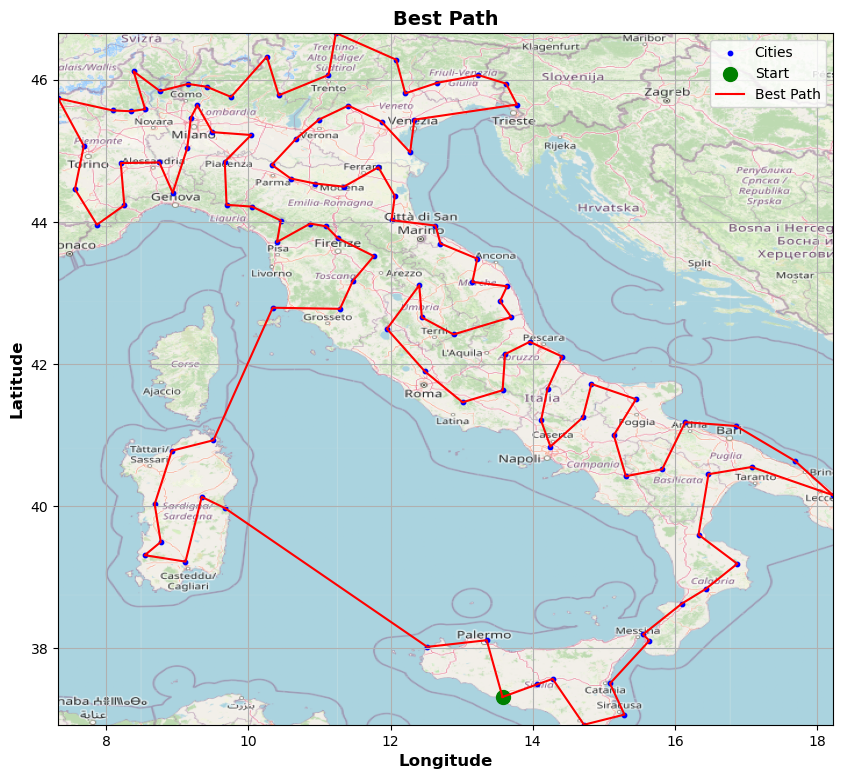

In [26]:
# Load your data
x, y = np.loadtxt('DATA/Migration/0/BestPath.dat', unpack=True)

df = pd.read_csv('INPUT/cap_prov_ita.dat',sep=' ',header=None, names=['Longitude','Latitude'])

# Define the bounding box
BBox = ((df.Longitude.min(),   df.Longitude.max(),      
         df.Latitude.min(), df.Latitude.max()))

ruh_m = plt.imread('imgs/italy.png')

fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(df.Longitude, df.Latitude, zorder=1, alpha= 1, c='b', s=10, label='Cities')
ax.scatter(x[0],y[0], zorder=1, alpha= 1, c='g', s=100, label='Start')
ax.plot(x,y,marker=' ',color= 'red',label='Best Path')
ax.set_title('Best Path', fontsize=14, fontweight='bold')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')
ax.set_xlabel('Longitude', fontsize=12, fontweight='bold')
ax.set_ylabel('Latitude', fontsize=12, fontweight='bold')

ax.legend()
plt.grid()
plt.show()

Here is a gif of the continent that found the overall best path first.

![Alt Text](imgs/Italy.gif)